In [5]:
pth = '../weights/resnet50_cifar100.pth'
data = '../data/cls/cifar-100-python.tar.gz'

In [7]:
import torch
import torchvision.models as models

pth = '../weights/resnet50_cifar100.pth'
data = '../data/cls/cifar-100-python.tar.gz'

# 加载模型
model = models.resnet50(pretrained=False)
num_ftrs = model.fc.in_features
# model.fc = torch.nn.Linear(num_ftrs, 100)  # 替换最后一层

# 加载预训练权重
model.load_state_dict(torch.load(pth))

# 设置模型为评估模式
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# 解压转换

In [9]:
# import os
# import pickle
# import numpy as np
# from PIL import Image
#
# def unpickle(file):
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict
#
# def save_images(data, save_dir):
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)
#     for i in range(len(data[b'filenames'])):
#         img = data[b'data'][i]
#         img = np.reshape(img, (3, 32, 32)).transpose(1, 2, 0)
#         img = Image.fromarray(img)
#         label = data[b'fine_labels'][i]
#         filename = os.path.join(save_dir, f"{data[b'filenames'][i].decode('utf-8')}")
#         img.save(filename)
#
# def extract_data(data_file):
#     data = unpickle(data_file)
#     return data
#
# if __name__ == "__main__":
#     data_file = '../data/cls/cifar-100-python.tar.gz'  # 数据集文件路径
#     save_dir = '../data/cls/cifar-100'  # 保存图像的路径
#     train_data_file = os.path.join(data_file, 'train')
#     @ = os.path.join(data_file, 'test')
#     train_data = extract_data(train_data_file)
#     test_data = extract_data(test_data_file)
#     save_images(train_data, os.path.join(save_dir, 'train'))
#     save_images(test_data, os.path.join(save_dir, 'test'))

FileNotFoundError: [Errno 2] No such file or directory: '../data/cls/cifar-100-python.tar.gz\\train'

然后将其解压缩到指定的文件夹中

In [10]:
import tarfile

# 解压缩数据集
with tarfile.open('../data/cls/cifar-100-python.tar.gz', 'r:gz') as tar:
    tar.extractall('../data/cls/')

全展开

In [11]:
import os
import pickle
import numpy as np
from PIL import Image

# 加载数据集
def load_cifar100_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    return data

data = load_cifar100_data('../data/cls/cifar-100-python/train')

# 创建目录
os.makedirs('../data/cls/cifar-100-images/train', exist_ok=True)
os.makedirs('../data/cls/cifar-100-images/test', exist_ok=True)

# 转换数据集为图像格式
for i, (image, label) in enumerate(zip(data[b'data'], data[b'fine_labels'])):
    image = np.reshape(image, (3, 32, 32))
    image = np.transpose(image, (1, 2, 0))
    img = Image.fromarray(image)
    img.save(f'../data/cls/cifar-100-images/train/{i}.png')

分别V1 : 类别不稳定

In [13]:
import os
import pickle
import numpy as np
from PIL import Image
import tarfile

# 解压缩数据集
with tarfile.open('../data/cls/cifar-100-python.tar.gz', 'r:gz') as tar:
    tar.extractall('../data/cls/')

# 加载数据集
def load_cifar100_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    return data

train_data = load_cifar100_data('../data/cls/cifar-100-python/train')
test_data = load_cifar100_data('../data/cls/cifar-100-python/test')

# 创建目录
train_dir = '../data/cls/cifar-100-images/train'
test_dir = '../data/cls/cifar-100-images/test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 根据类别保存图像
def save_images(data, dirname):
    for i, (image, label) in enumerate(zip(data[b'data'], data[b'fine_labels'])):
        image = np.reshape(image, (3, 32, 32))
        image = np.transpose(image, (1, 2, 0))
        img = Image.fromarray(image)
        label_dir = os.path.join(dirname, str(label))
        os.makedirs(label_dir, exist_ok=True)
        img.save(os.path.join(label_dir, f'{i}.png'))

save_images(train_data, train_dir)
save_images(test_data, test_dir)

In [27]:
import os
import pickle
import numpy as np
from PIL import Image
import tarfile

# 解压缩数据集
with tarfile.open('../data/cls/cifar-100-python.tar.gz', 'r:gz') as tar:
    tar.extractall('../data/cls/')

# 加载数据集
def load_cifar100_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    fine_labels = np.array(data[b'fine_labels'])
    label_names = data[b'fine_label_names']
    classes = [label.decode() for label in label_names]
    return data, fine_labels, classes

train_data, train_labels, train_classes = load_cifar100_data('../data/cls/cifar-100-python/train')
test_data, test_labels, test_classes = load_cifar100_data('../data/cls/cifar-100-python/test')

# 创建目录
train_dir = '../data/cls/cifar-100-images/train'
test_dir = '../data/cls/cifar-100-images/test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 根据类别保存图像
def save_images(data, labels, classes, dirname):
    for i, (image, label) in enumerate(zip(data[b'data'], labels)):
        image = np.reshape(image, (3, 32, 32))
        image = np.transpose(image, (1, 2, 0))
        img = Image.fromarray(image)
        label_dir = os.path.join(dirname, classes[label])
        os.makedirs(label_dir, exist_ok=True)
        img.save(os.path.join(label_dir, f'{i}.png'))

save_images(train_data, train_labels, train_classes, train_dir)
save_images(test_data, test_labels, test_classes, test_dir)

KeyError: b'fine_label_names'

# 数据加载器
从 ../data/cls/cifar-100-images/ 中加载cifar-100图像分类数据集：

In [14]:
import os
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

# 数据增强
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# 加载数据集
def load_cifar100(root, train=True, transform=None):
    data_dir = os.path.join(root, 'train' if train else 'test')
    dataset = ImageFolder(data_dir, transform=transform)
    return dataset

# 加载训练集和测试集
train_dataset = load_cifar100('../data/cls/cifar-100-images/', train=True, transform=train_transform)
test_dataset = load_cifar100('../data/cls/cifar-100-images/', train=False, transform=test_transform)

# 创建数据加载器
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [15]:
# 加载模型
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model.to(device)


# 统计准确率
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy of the model on the test images: {accuracy:.2f}%')

Test Accuracy of the model on the test images: 4.63%


准确率错误太多
开始debug

Test Accuracy of the model on the test images: 4.63%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

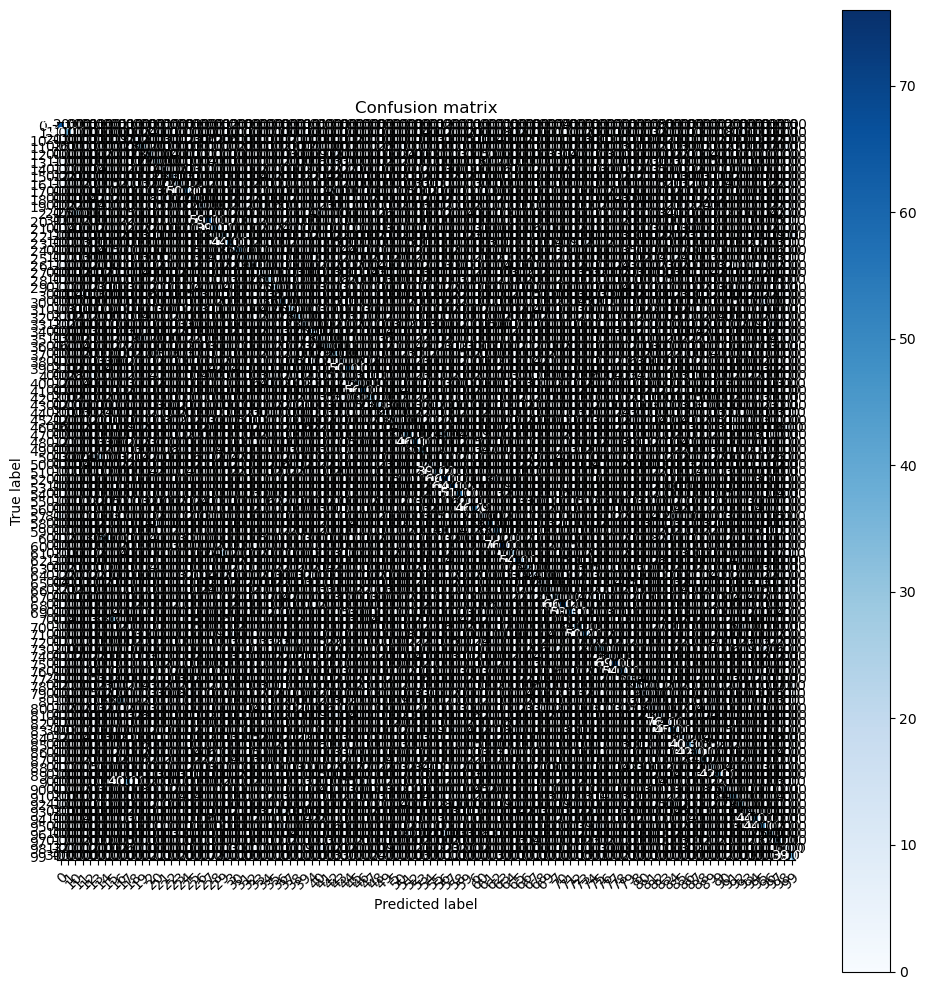

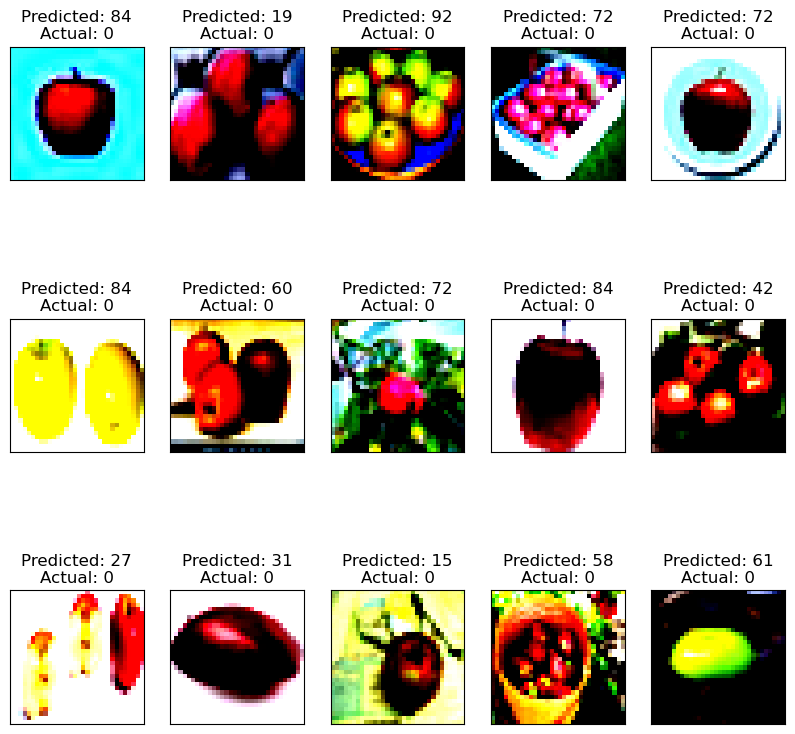

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


# 加载模型
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


# 统计准确率和混淆矩阵
correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

accuracy = 100 * correct / total
print(f'Test Accuracy of the model on the test images: {accuracy:.2f}%')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred)
classes = test_dataset.classes

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=classes, yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label',
       title='Confusion matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fmt = '.2f'
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], fmt),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > thresh else "black")
fig.tight_layout()

# 查看分类错误的图像
misclassified_idx = np.where(np.array(y_true) != np.array(y_pred))[0]
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, idx in enumerate(misclassified_idx[:15]):
    ax = axes.flat[i]
    ax.imshow(test_dataset[idx][0].permute(1, 2, 0))
    ax.set_title(f"Predicted: {classes[y_pred[idx]]}\nActual: {classes[y_true[idx]]}")
plt.show()

In [17]:
print(model.classes)

AttributeError: 'ResNet' object has no attribute 'classes'

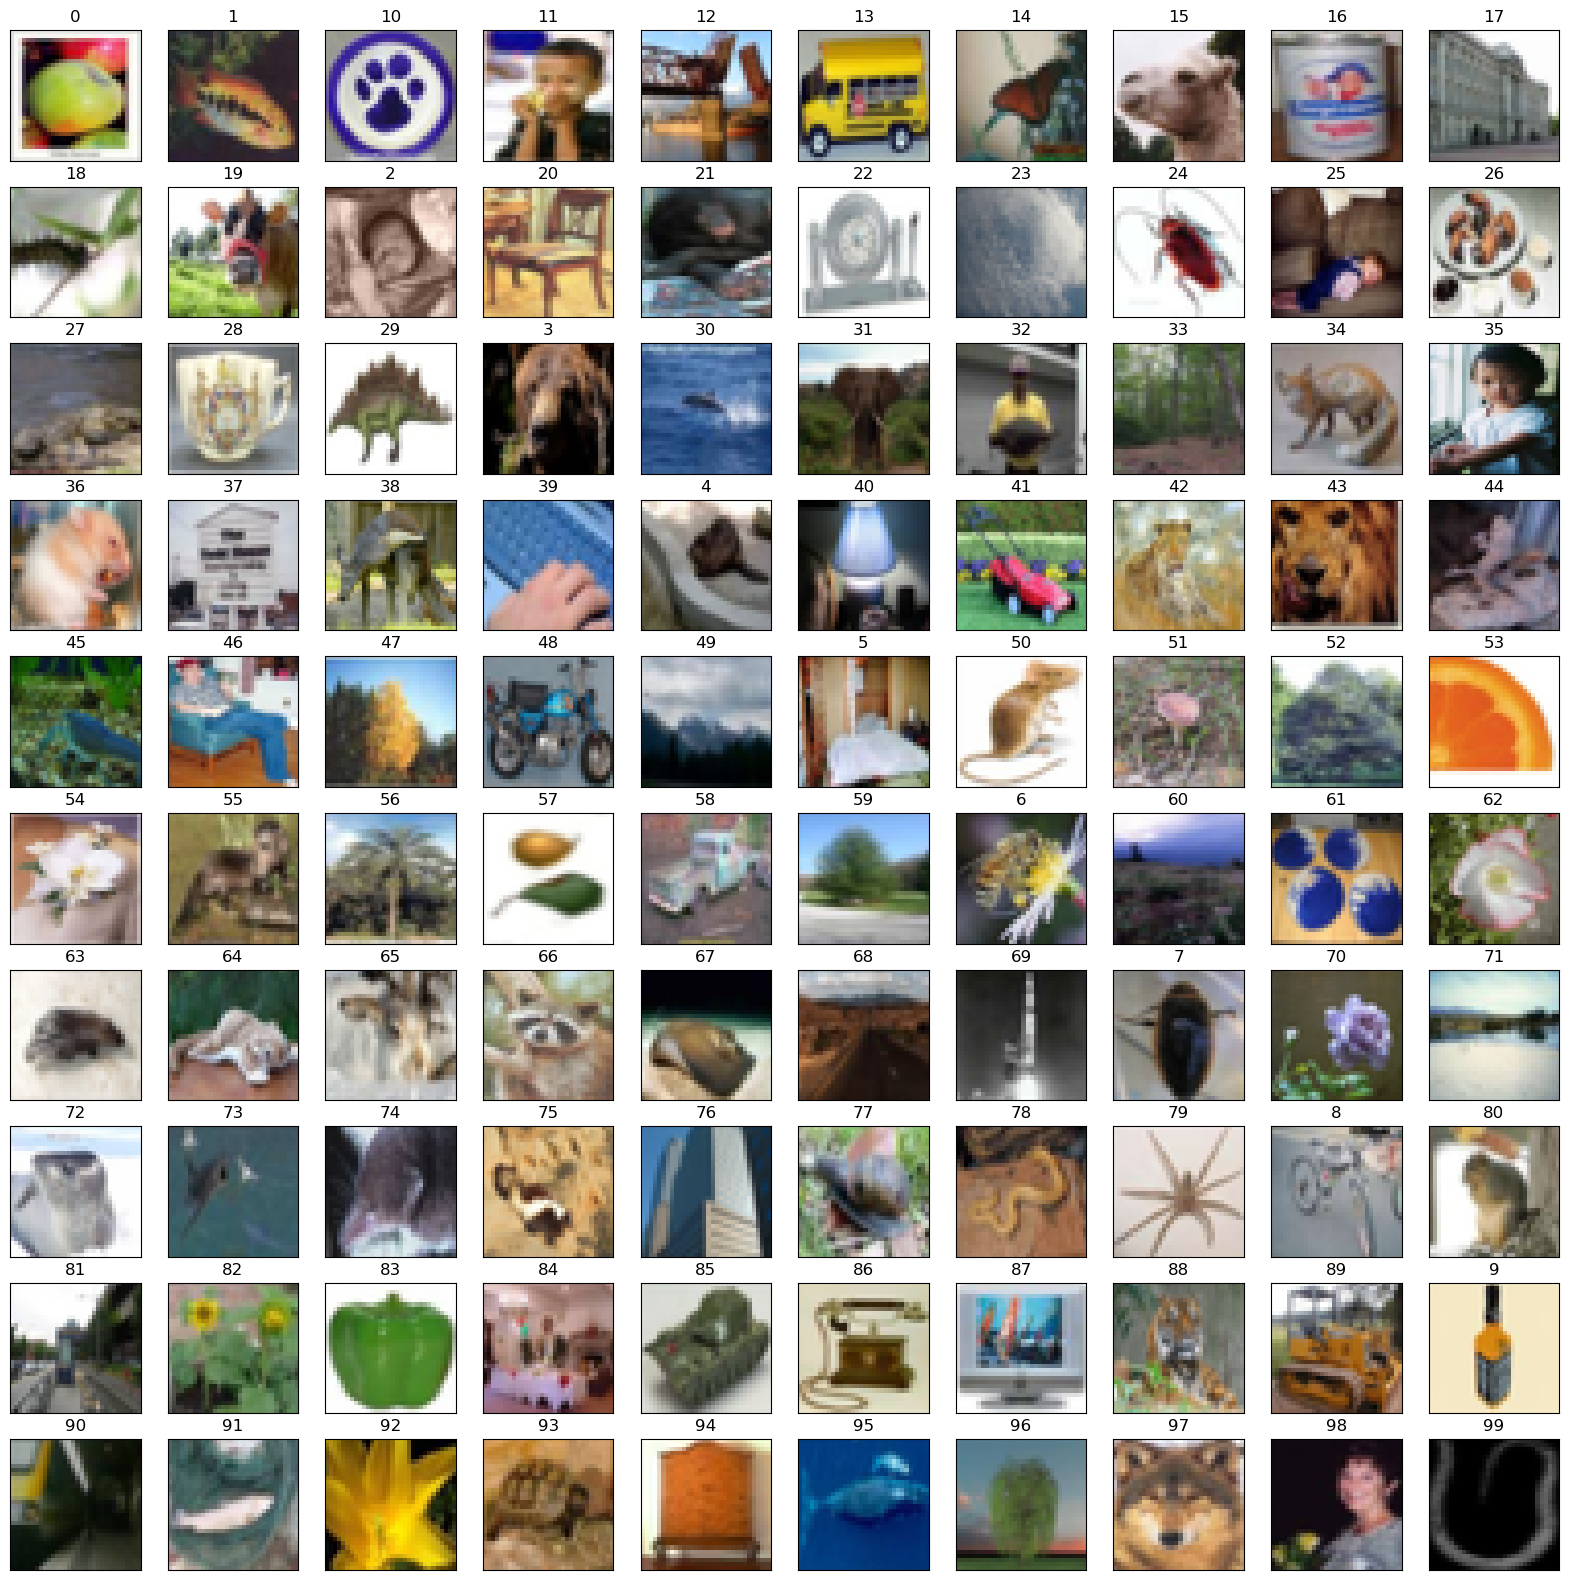

In [21]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# 定义数据集和数据加载器
data_dir = '../data/cls/cifar-100-images/train'
dataset = torchvision.datasets.ImageFolder(data_dir)

classes = dataset.classes

# 选择每个类别中的一个样本
selected_samples = []
selected_labels = []
for i in range(len(classes)):
    indices = np.where(np.array(dataset.targets) == i)[0]
    selected_index = indices[0]
    selected_samples.append(dataset[selected_index][0])
    selected_labels.append(i)

# 可视化选择的样本
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_samples[i])
    ax.set_title(classes[selected_labels[i]])
plt.show()

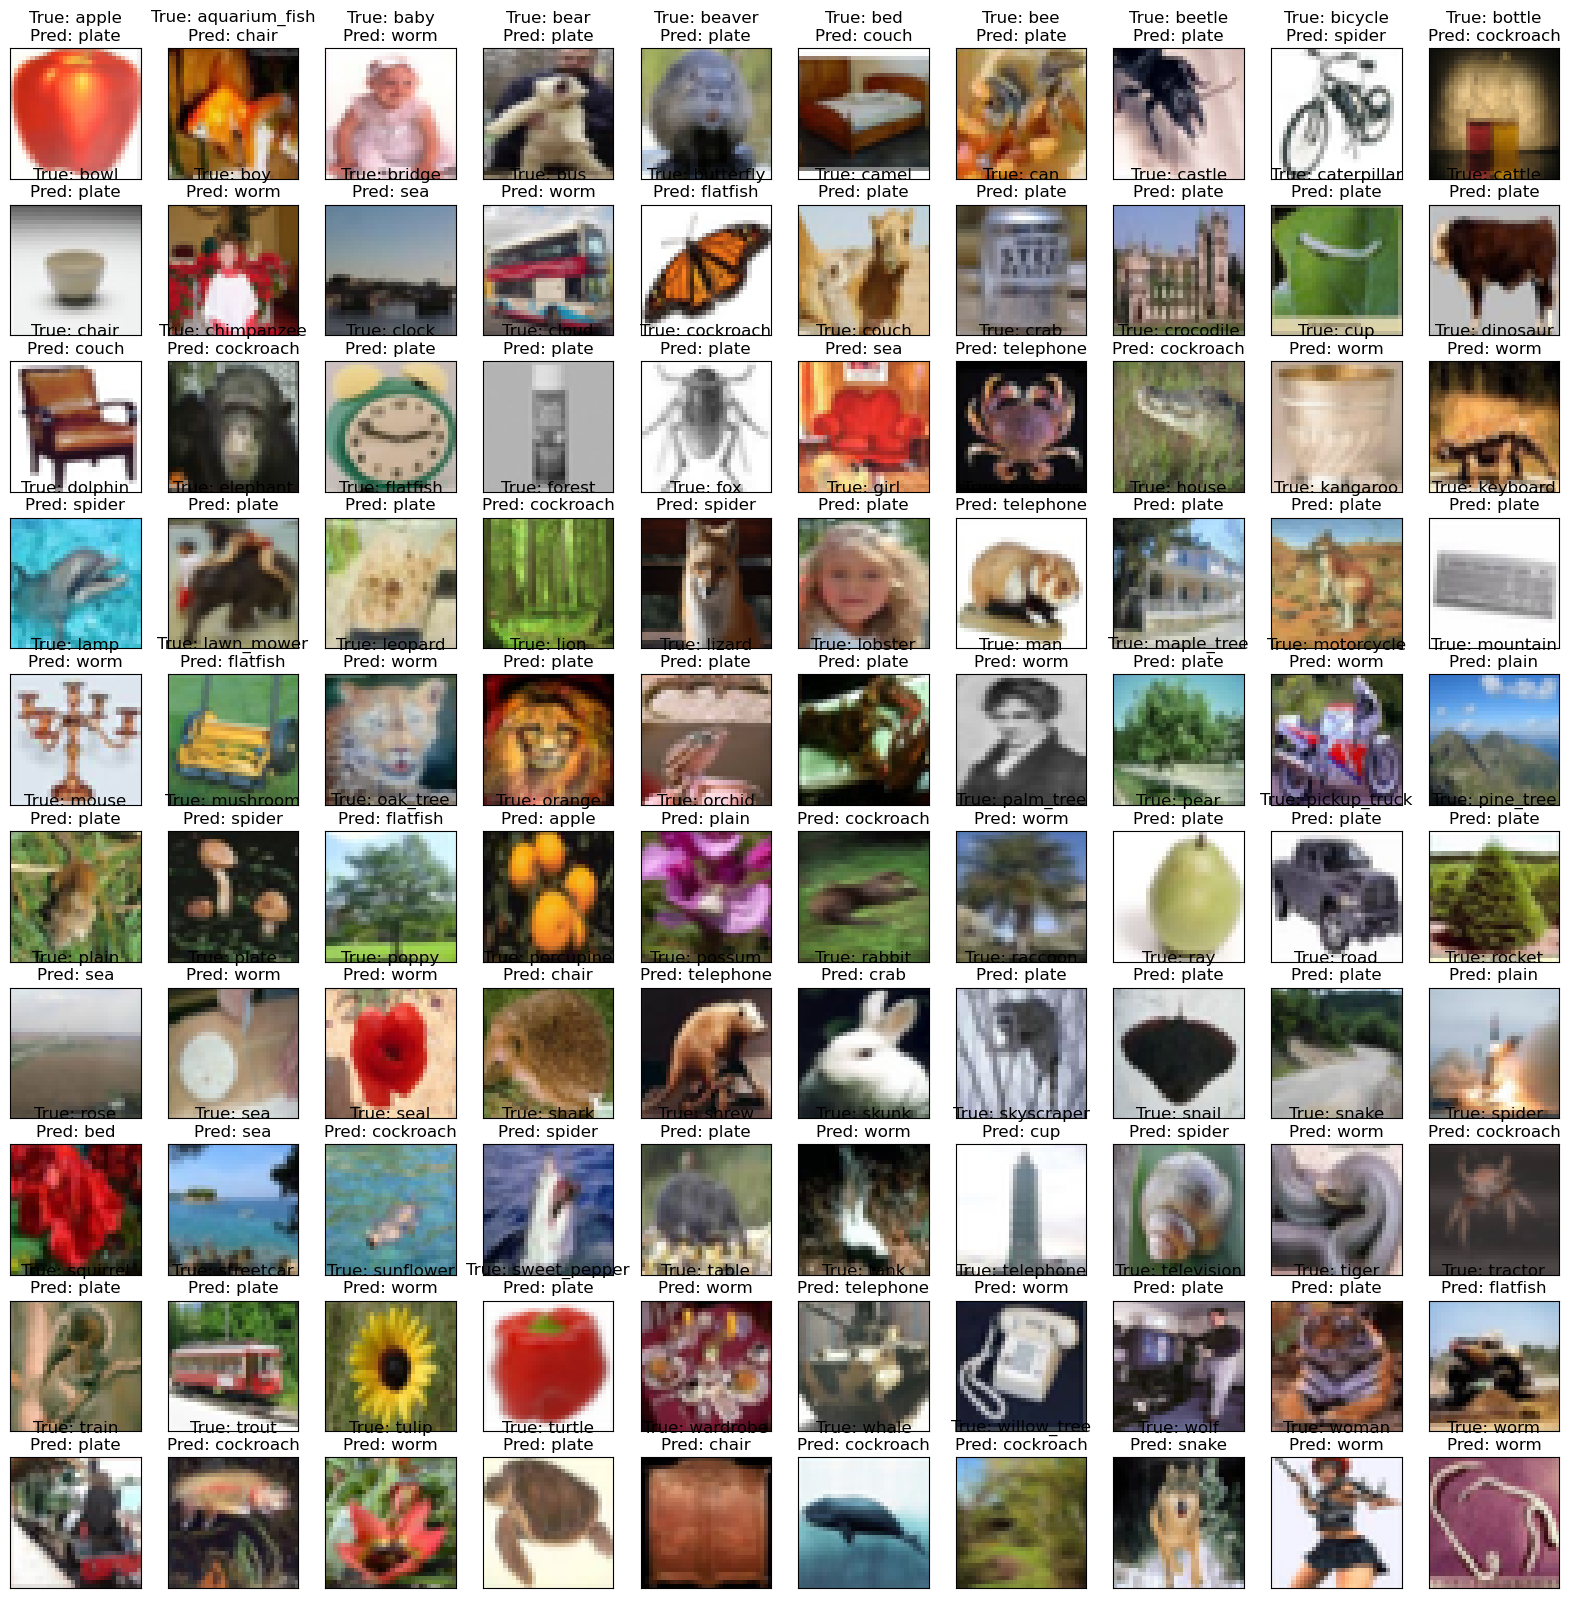

In [30]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# 定义数据集和数据加载器
data_dir = '../data/cls/cifar100-pic-version/train'
dataset = torchvision.datasets.ImageFolder(data_dir)

classes = sorted(dataset.classes)

# 定义模型
# # model = YourModel()  # 替换成你的模型
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model.to(device)
# model.eval()

# 选择每个类别中的一个样本，并进行推断
selected_samples = []
selected_labels = []
selected_preds = []  # 存储推断结果
with torch.no_grad():
    for i, class_name in enumerate(classes):
        indices = np.where(np.array(dataset.targets) == i)[0]
        selected_index = np.min(indices)
        selected_sample, selected_label = dataset[selected_index]
        selected_sample = torchvision.transforms.ToTensor()(selected_sample)
        selected_sample = selected_sample.unsqueeze(0).to(device)
        selected_pred = model(selected_sample).argmax(1).item()
        selected_samples.append(selected_sample.cpu())
        selected_labels.append(selected_label)
        selected_preds.append(selected_pred)

# 可视化选择的样本和推断结果
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_samples[i][0].permute(1, 2, 0))
    ax.set_title(f"True: {classes[selected_labels[i]]}\nPred: {classes[selected_preds[i]]}")
plt.show()

In [31]:
classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torch.utils.data import DataLoader

bs = 16

train_dataset = load_cifar100('../data/cls/cifar100-pic-version', train=True, transform=train_transform)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 创建数据加载器
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=bs, shuffle=True, num_workers=4)

# 数据加载器和模型的相关信息
data_loader = train_loader
model = model

# 定义损失函数
loss_fn = nn.CrossEntropyLoss()

# 初始化 patch 参数
# patch = torch.randn(64, 3, 6, 6, requires_grad=True)
# patch = torch.zeros(1, 3, 6, 6, requires_grad=True).to(device) # repeat the patch 16 times to match the batch size
patch = torch.randn(1, 3, 6, 6, requires_grad=True).to(device)
patch = nn.Parameter(patch)  # 转换为叶子张量
# 优化器
optimizer = optim.SGD([patch], lr=0.01)
# patch = patch.repeat(16, 1, 1, 1)

num_epochs = 5
# 运行优化
for epoch in range(num_epochs):
    for images, targets in data_loader:
        # 将 patch 放置在图像上
        patched_images = images.to(device)
        targets = targets.to(device)
        x=5
        y=5
        patched_images[:, :, y:y+6, x:x+6] = patch.repeat(bs, 1, 1, 1)

        # 零梯度
        optimizer.zero_grad()

        # 模型推理
        outputs = model(patched_images)
        # outputs = torch.argmax(outputs, dim=1)  # 对输出进行argmax操作

        # 计算损失
        loss = loss_fn(outputs, targets)

        # 反向传播和参数更新
        loss.backward()
        optimizer.step()

    # 打印每个 epoch 的损失
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

# 最终的优化结果
optimized_patch = patch.detach()


Epoch [1/5], Loss: 1.0400298833847046
Epoch [2/5], Loss: 0.8840739727020264
Epoch [3/5], Loss: 2.0449438095092773
Epoch [4/5], Loss: 1.4497110843658447
Epoch [5/5], Loss: 2.0500948429107666


Epoch [1/5], Loss: 6.447821617126465
Epoch [2/5], Loss: 9.80623722076416
Epoch [3/5], Loss: 18.730844497680664
Epoch [4/5], Loss: 31.553030014038086


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [5/5], Loss: 49.98139572143555


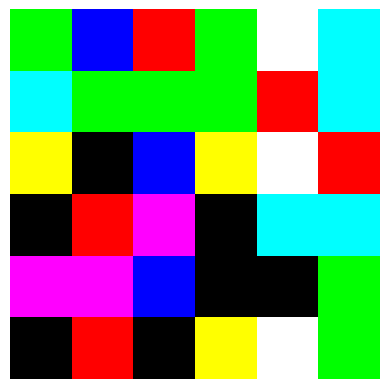

In [67]:
targets.size(),outputs.size(),images.size()

(torch.Size([16]), torch.Size([16, 100]), torch.Size([16, 3, 32, 32]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


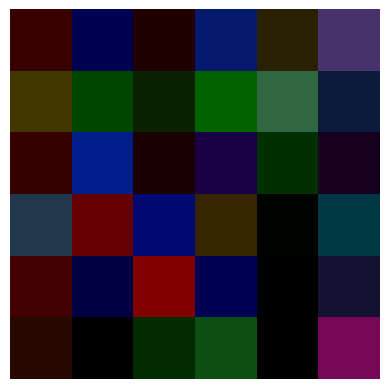

In [68]:
import matplotlib.pyplot as plt

# display the optimized patch
plt.imshow(optimized_patch[0].cpu().permute(1, 2, 0))
plt.axis('off')
plt.show()

In [41]:
torch.cuda.is_available()

True

In [54]:
train_loader